In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg

In [2]:
Sales_zone=pd.read_csv(r"D:\DSA - ICT\Week 8\Case study\Sales_data_zone_wise.csv")

In [3]:
Sales_zone.iloc[:,0:4]

,Month,Zone - A,Zone - B,Zone - C
0,Month - 1,1483525,1748451,1523308
1,Month - 2,1238428,1707421,2212113
2,Month - 3,1860771,2091194,1282374
3,Month - 4,1871571,1759617,2290580
4,Month - 5,1244922,1606010,1818334
5,Month - 6,1534390,1573128,1751825
6,Month - 7,1820196,1992031,1786826
7,Month - 8,1625696,1665534,2161754
8,Month - 9,1652644,1873402,1755290
9,Month - 10,1852450,1913059,1754314


In [4]:
Sales_zone.describe().iloc[:,0:4]

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [5]:
#Question 1- Mean sales - Zone wise

In [6]:
Mean_sales=Sales_zone.describe().loc["mean","Zone - A":"Zone - D"].to_frame()
Mean_sales

,mean
Zone - A,1.540493e+06
Zone - B,1.755560e+06
Zone - C,1.772871e+06
Zone - D,1.842927e+06


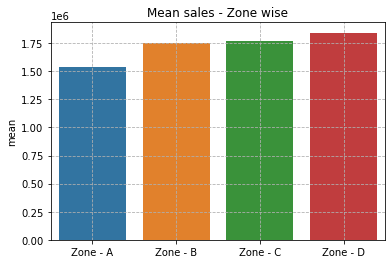

In [7]:
sns.barplot(x=Mean_sales.index,y=Mean_sales["mean"])
plt.title("Mean sales - Zone wise")
plt.grid(linestyle="--")
plt.show()

In [8]:
#Question 2-  Total sales generated by all the zones for each month

In [9]:
Sales_zone["Total sales"]=Sales_zone.iloc[:,1:5].sum(axis=1)
Sales_zone.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328


In [10]:
Sales_zone.loc[:,["Month","Total sales"]]

,Month,Total sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


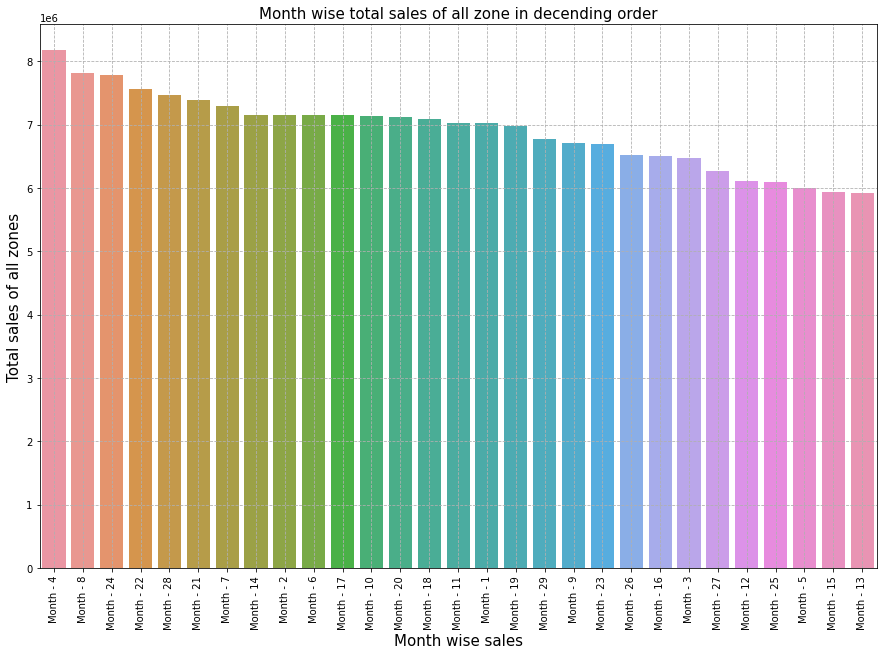

In [11]:
plt.figure(figsize=(15,10))
sns.barplot(x="Month",y="Total sales",data=Sales_zone.sort_values('Total sales',ascending=False))
plt.xlabel("Month wise sales",fontsize=15)
plt.ylabel("Total sales of all zones",fontsize=15)
plt.title("Month wise total sales of all zone in decending order",fontsize=15)
plt.xticks(rotation=90)
plt.grid(linestyle="--")
plt.show()

In [12]:
#Question 3-  Check whether all the zones generate the same amount of sales.

In [13]:
#Null hypothesis: All the zones generate the same amount of sales
#Alternate hypothesis :All zones not generate the same amount of sales

In [14]:
ZoneA=Sales_zone["Zone - A"]
ZoneB=Sales_zone["Zone - B"]
ZoneC=Sales_zone["Zone - C"]
ZoneD=Sales_zone["Zone - D"]

In [15]:
#Checking for normal distribution 

In [16]:
stats.shapiro(ZoneA)

ShapiroResult(statistic=0.9369863271713257, pvalue=0.08361761271953583)

In [17]:
stats.shapiro(ZoneB)

ShapiroResult(statistic=0.9357458353042603, pvalue=0.0776052474975586)

In [18]:
stats.shapiro(ZoneC)

ShapiroResult(statistic=0.9428116083145142, pvalue=0.11880273371934891)

In [19]:
stats.shapiro(ZoneD)

ShapiroResult(statistic=0.9255194664001465, pvalue=0.04216405004262924)

In [20]:
#Here in all Zones except D , the p value is greater than 0.05 and follow normal distribution
#Zone-D p value is less than 0.05 , Hence not follow Normal Distibution 

In [21]:
#Check for equal variance - we can use Bartlett if normal distribution is followed or Levene if not in normal distribution

In [22]:
stats.levene(ZoneA,ZoneB,ZoneC,ZoneD)

LeveneResult(statistic=7.880137126484079, pvalue=8.119702253594172e-05)

In [23]:
#Since P value less than 0.05 , we reject hypothessis of equal variance

In [24]:
SZ=pd.melt(Sales_zone.reset_index(), id_vars=['index'],value_vars=["Zone - A","Zone - B","Zone - C","Zone - D"])

In [25]:
SZ.columns=["index","Month","value"]

In [26]:
#Since unequal variance , we use the welch anova test using the pingouin function

In [27]:
av=pg.anova(data=SZ,dv="value",between="Month",detailed=True)
print(av)

   Source            SS   DF            MS         F     p-unc       np2
0   Month  1.483058e+12    3  4.943525e+11  5.672056  0.001183  0.131892
1  Within  9.761449e+12  112  8.715579e+10       NaN       NaN       NaN


In [28]:
#Since the p value is than alpha value of 0.05 , we reject the null hypothesis and confirm Zones dont generate equal sales

In [29]:
#Boxplot shows the distribution of sales of all the zones

<AxesSubplot:xlabel='Month', ylabel='value'>

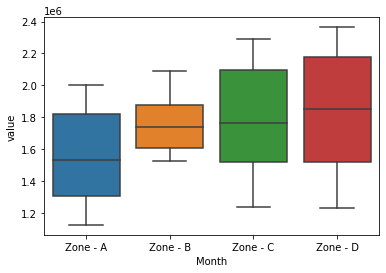

In [30]:
sns.boxplot(x="Month",y= "value",data=SZ)

In [31]:
#Pie chart showing the sum of sales % - zone wise

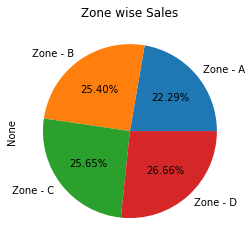

In [32]:
Sales_zone[Sales_zone.columns[1:5]].sum().plot.pie(autopct = "%1.2f%%")
plt.title("Zone wise Sales")
plt.show()

In [33]:
# From the box plot and Pie chart we can see that sales generated by all zones are not same 
#This confirms and matches with our hypothesis results